In [1]:
import numpy as np
import matplotlib.pyplot as plt
import dill
from os import listdir
import os 
%matplotlib inline

In [2]:
def moving_average(a, n=500):
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n-1:] / n

# Plotting performance

Below we plot Figure 4 in the paper. We assume five **parallel** runs with different seeds. More precisely, the filenames will contain the expressions `'nruns_1'` and `'seed_{seed}'` where `seed = 1, ... , 5` read the files from their directory. All are stored in `'runs/{game}/'` where in this case `game = 'Fourrooms-v0'`. 

First we put all histories in a list like `hist222tree`, by looking for filenames with expressions that uniquely tie them to the runs for `<1, 2, 2, 2> HOC`. Next we take their average in `hist222tree = np.average(hist222tree,axis = 0)`.

To plot performance, we plot the moving average of the root option. Since the history arrays have the form `history[run, episode, option_uid, k]`, `options_uid = 0` represents the root, and `k=0` gives the average duration that the option is used. This is the same as the average option length. Since the root never terminates, this is equal to the duration of the episode, which is how we benchmark models in this task.

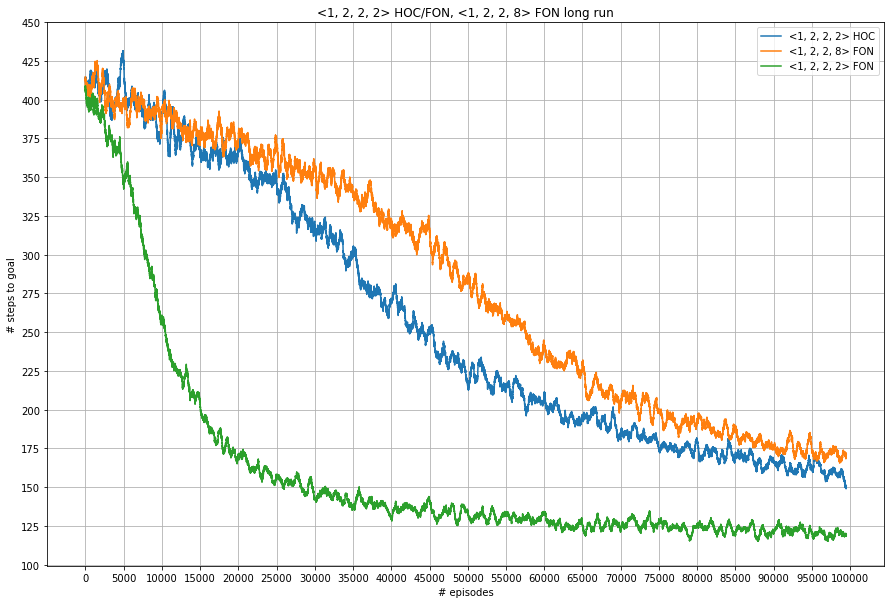

In [3]:
plt.figure(figsize=(15,10))

data_dir = f'runs/Fourrooms-v0/' 
hist222tree=[]
for fname in listdir(data_dir):
    if fname.find('[2, 2, 2]') != -1 and fname.find('.npy') != -1 and fname.find('temperature_term_1')!=-1 and fname.find('shared_False')!=-1:
        hist222tree.append(np.load(data_dir+fname))
        
hist222tree = np.average(hist222tree,axis = 0)
plt.plot(moving_average(np.average(hist222tree[:,:100000,0,0],axis = 0), 500), label=f'<1, 2, 2, 2> HOC')

hist228=[]
for fname in listdir(data_dir):
    if fname.find('[2, 2, 8]') != -1 and fname.find('.npy') != -1 and fname.find('temperature_term_1')!=-1 and fname.find('shared_False')!=-1:
        hist228.append(np.load(data_dir+fname))
    
hist228 = np.average(hist228,axis = 0)
plt.plot(moving_average(np.average(hist228[:,:100000,0,0],axis = 0), 500), label=f'<1, 2, 2, 8> FON')

hist222=[]
for fname in listdir(data_dir):
    if fname.find('[2, 2, 2]') != -1 and fname.find('.npy') != -1 and fname.find('temperature_term_1')!=-1 and fname.find('shared_True')!=-1:
        hist222.append(np.load(data_dir+fname))

hist222 = np.average(hist222,axis = 0)
plt.plot(moving_average(np.average(hist222[:,:100000,0,0],axis = 0), 500), label=f'<1, 2, 2, 2> FON')

plt.yticks(np.arange(100, 475,25))
plt.xticks(np.arange(0, 102000, 5000))
plt.xlabel('# episodes')
plt.ylabel('# steps to goal')
plt.title('<1, 2, 2, 2> HOC/FON, <1, 2, 2, 8> FON long run')
plt.legend()
plt.grid()
plt.show()

# Plotting option length

Below we partially plot the right chart in Figure 8 of the paper. The procedure is similar to above for reading the files, this time for the `<1, 2, 2> FON` model.

Since the history arrays have the form `history[run, episode, option_uid, k]`, `options_uid = i` represents the `i`-th option, and they are enumerated from top to bottom. So option `1, 2` are on the level below the root, and `3, 4` are the two lowest options. `k=0` gives the average duration that the option is used. This is the same as the average option length which is what we would like to plot.

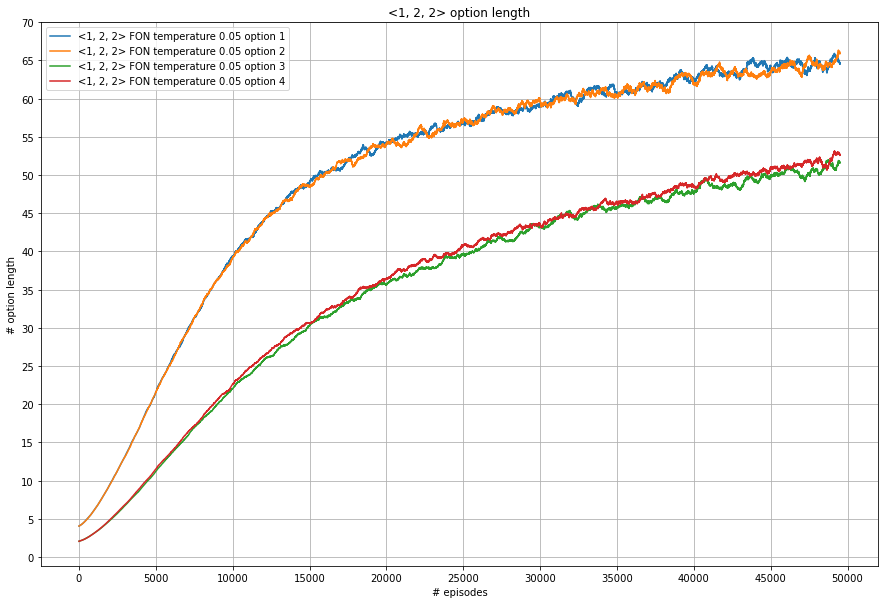

In [8]:
plt.figure(figsize=(15,10))

data_dir = f'runs/Fourrooms-v0/' 

hist22temp=[]
for fname in listdir(data_dir):
    if fname.find('[2, 2]') != -1 and fname.find('.npy') != -1 and fname.find('temperature_term_0.05')!=-1 and fname.find('shared_True')!= -1:
        hist22temp.append(np.load(data_dir+fname))

hist22temp = np.average(hist22temp,axis = 0)

plt.plot(moving_average(np.average(hist22temp[:,:,1,0],axis = 0), 500), label=f'<1, 2, 2> FON temperature 0.05 option 1')
plt.plot(moving_average(np.average(hist22temp[:,:,2,0],axis = 0), 500), label=f'<1, 2, 2> FON temperature 0.05 option 2')
plt.plot(moving_average(np.average(hist22temp[:,:,3,0],axis = 0), 500), label=f'<1, 2, 2> FON temperature 0.05 option 3')
plt.plot(moving_average(np.average(hist22temp[:,:,4,0],axis = 0), 500), label=f'<1, 2, 2> FON temperature 0.05 option 4')

plt.yticks(np.arange(0, 75, 5.0))
plt.xticks(np.arange(0, 52000, 5000))
plt.xlabel('# episodes')
plt.ylabel('# option length')
plt.title('<1, 2, 2> option length')
plt.legend()
plt.grid()
plt.show()

# Plotting option usage

Below we plot a figure not present in the paper. We plot how many times each option has been used in an episode. This is achieved by selecting `k=2`.

We observe that options at each level are used **almost** exactly the same number of times, hence why it appears that there are only three graphs here instead of five. Notice the root (`option 0`) is being used once as expected.

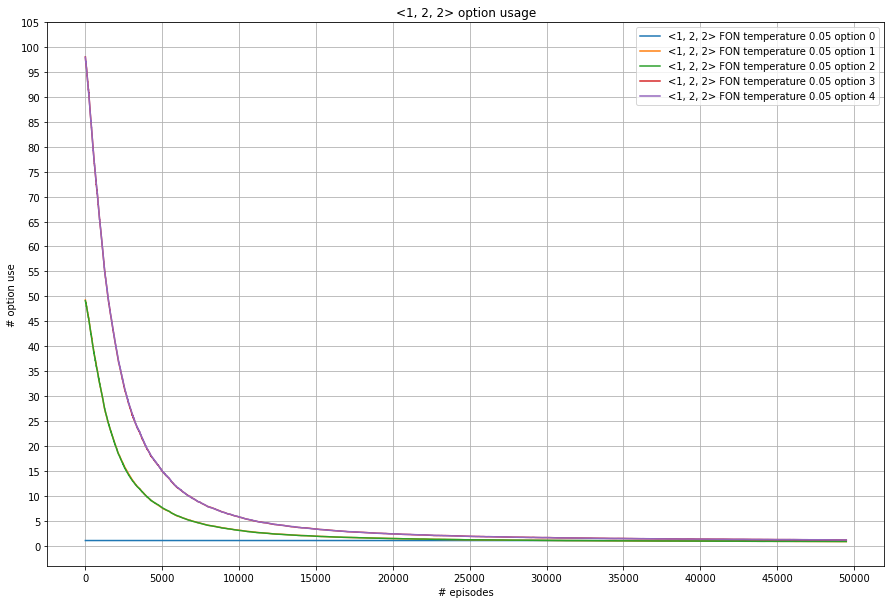

In [23]:
plt.figure(figsize=(15,10))

data_dir = f'runs/Fourrooms-v0/' 

hist22temp=[]
for fname in listdir(data_dir):
    if fname.find('[2, 2]') != -1 and fname.find('.npy') != -1 and fname.find('temperature_term_0.05')!=-1 and fname.find('shared_True')!= -1:
        hist22temp.append(np.load(data_dir+fname))

hist22temp = np.average(hist22temp,axis = 0)

plt.plot(moving_average(np.average(hist22temp[:,:,0,2],axis = 0), 500), label=f'<1, 2, 2> FON temperature 0.05 option 0')
plt.plot(moving_average(np.average(hist22temp[:,:,1,2],axis = 0), 500), label=f'<1, 2, 2> FON temperature 0.05 option 1')
plt.plot(moving_average(np.average(hist22temp[:,:,2,2],axis = 0), 500), label=f'<1, 2, 2> FON temperature 0.05 option 2')
plt.plot(moving_average(np.average(hist22temp[:,:,3,2],axis = 0), 500), label=f'<1, 2, 2> FON temperature 0.05 option 3')
plt.plot(moving_average(np.average(hist22temp[:,:,4,2],axis = 0), 500), label=f'<1, 2, 2> FON temperature 0.05 option 4')

plt.yticks(np.arange(0, 110, 5.0))
plt.xticks(np.arange(0, 52000, 5000))
plt.xlabel('# episodes')
plt.ylabel('# option use')
plt.title('<1, 2, 2> option usage')
plt.legend()
plt.grid()
plt.show()

We plot a more detailed picture of what happens after 10000 episodes. Options at each level are used **almost** the same number of times, but we see the options at the first level being used less often. The reason why their average is smaller than one (which is the root usage) is because sometimes an option at the first level is not used in an entire episode.

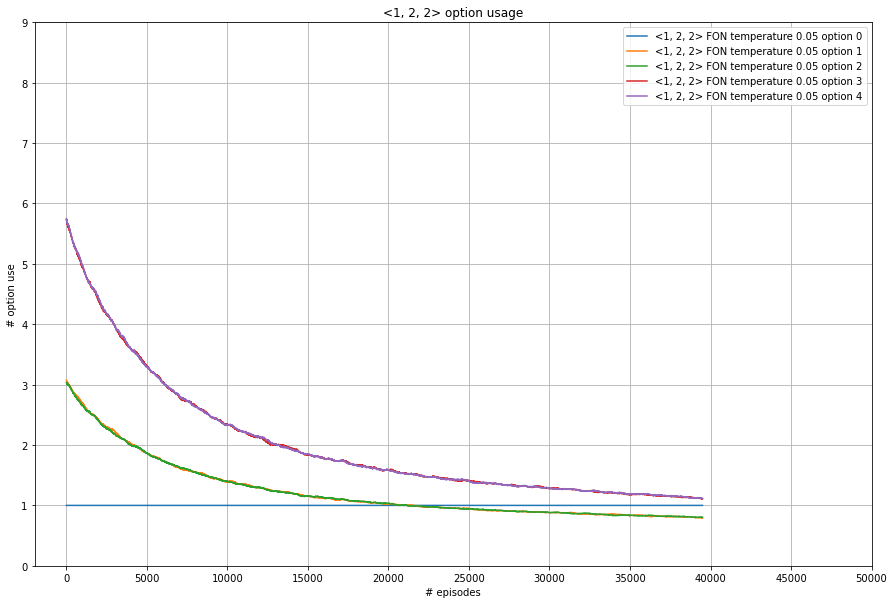

In [27]:
plt.figure(figsize=(15,10))

data_dir = f'runs/Fourrooms-v0/' 

hist22temp=[]
for fname in listdir(data_dir):
    if fname.find('[2, 2]') != -1 and fname.find('.npy') != -1 and fname.find('temperature_term_0.05')!=-1 and fname.find('shared_True')!= -1:
        hist22temp.append(np.load(data_dir+fname))

hist22temp = np.average(hist22temp,axis = 0)

plt.plot(moving_average(np.average(hist22temp[:,10000:,0,2],axis = 0), 500), label=f'<1, 2, 2> FON temperature 0.05 option 0')
plt.plot(moving_average(np.average(hist22temp[:,10000:,1,2],axis = 0), 500), label=f'<1, 2, 2> FON temperature 0.05 option 1')
plt.plot(moving_average(np.average(hist22temp[:,10000:,2,2],axis = 0), 500), label=f'<1, 2, 2> FON temperature 0.05 option 2')
plt.plot(moving_average(np.average(hist22temp[:,10000:,3,2],axis = 0), 500), label=f'<1, 2, 2> FON temperature 0.05 option 3')
plt.plot(moving_average(np.average(hist22temp[:,10000:,4,2],axis = 0), 500), label=f'<1, 2, 2> FON temperature 0.05 option 4')

plt.yticks(np.arange(0, 10, 1.0))
plt.xticks(np.arange(0, 52000, 5000))
plt.xlabel('# episodes')
plt.ylabel('# option use')
plt.title('<1, 2, 2> option usage')
plt.legend()
plt.grid()
plt.show()